In [31]:
from tenLoader import TenVideoDataset, normalize, TenVideoTest, TenVideoInfer
from model import FeatupExtra
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import PIL.Image as Image
import numpy as np
from preprocess_utensils import get_gray_image, get_boundary_iou
import json
from loss import order_loss, chamer_distance_loss
import random
import time
import re

In [32]:
model_name = "featConv5_10"
loss_log_path = f"./log/{model_name}_loss.json"
iou_log_path = f"./log/{model_name}_iou.json"
model_path = f"./model/{model_name}.pth"
log_path = f"./log/{model_name}.log"

In [33]:
dict_loss = {}
dict_iou = {}
with open(loss_log_path, "r") as f:
    dict_loss = json.load(f)
with open(iou_log_path, "r") as f:
    dict_iou = json.load(f)

In [34]:
numeric_dict_loss = {}
for key, value in dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
dict_loss = numeric_dict_loss
dict_iou = numeric_dict_iou

In [27]:
# log_record = ""
# with open(log_path, "r") as f:
#     log_record = f.read()

In [29]:
# log_records = log_record.split("\n")
# log_records.__len__()

1052

In [65]:
# for record in log_records:
#     epoch_num = re.findall(r"Epoch (\d+)", record)
#     if len(epoch_num) == 0:
#         continue
#     epoch_num = int(epoch_num[0])
#     loss = re.findall(r"Loss (\d+\.\d+)", record)
#     if len(loss) != 0:
#         dict_loss[epoch_num] = float(loss[0])
#         continue
#     iou = re.findall(r"IOU (\d+\.\d+)", record)
#     if len(iou) != 0:
#         dict_iou[epoch_num] = float(iou[0])
        

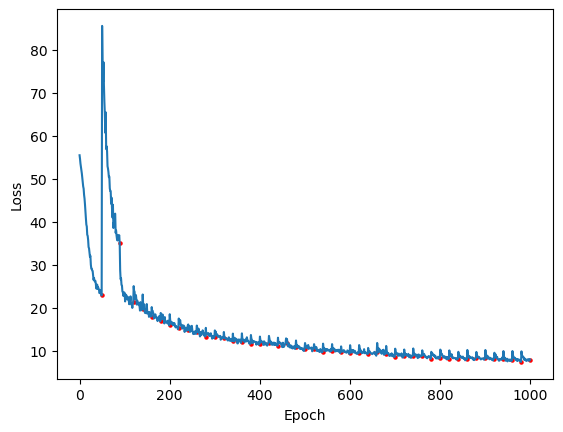

In [35]:
# plot the loss
plt.plot(list(dict_loss.keys()), list(dict_loss.values()))
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plot the update points
plt.scatter(list(dict_iou.keys()), [dict_loss[i-1] for i in list(dict_iou.keys())], c="r", s=5)
plt.show()

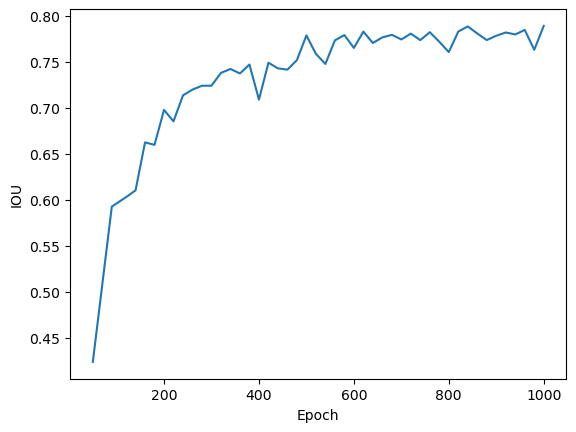

In [36]:
# plot the iou
plt.plot(list(dict_iou.keys()), list(dict_iou.values()))
plt.xlabel("Epoch")
plt.ylabel("IOU")
plt.show()

In [37]:
# load model
extra_encoder = nn.Sequential(
        nn.Conv2d(
        in_channels=384,
        out_channels=384,
        kernel_size=3,
        padding=1,
        stride=1,
    ),
    nn.ReLU(),
    nn.Conv2d(
        in_channels=384,
        out_channels=384,
        kernel_size=3,
        padding=1,
        stride=1,
    ),
    nn.ReLU(),
)
model = FeatupExtra(extra_encoder=extra_encoder)
model.load_state_dict(torch.load(model_path))

Using cache found in /zhome/32/f/202284/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /zhome/32/f/202284/.cache/torch/hub/facebookresearch_dino_main
/work3/s232248/miniconda3/envs/ras/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


<All keys matched successfully>

In [38]:
testset = TenVideoTest()

model_infer = TenVideoInfer(testset)


In [39]:
model_infer.infer_model(model)

In [40]:
model_infer.get_total_iou()

0.8081774667068418

IoU 0.6541936967850255


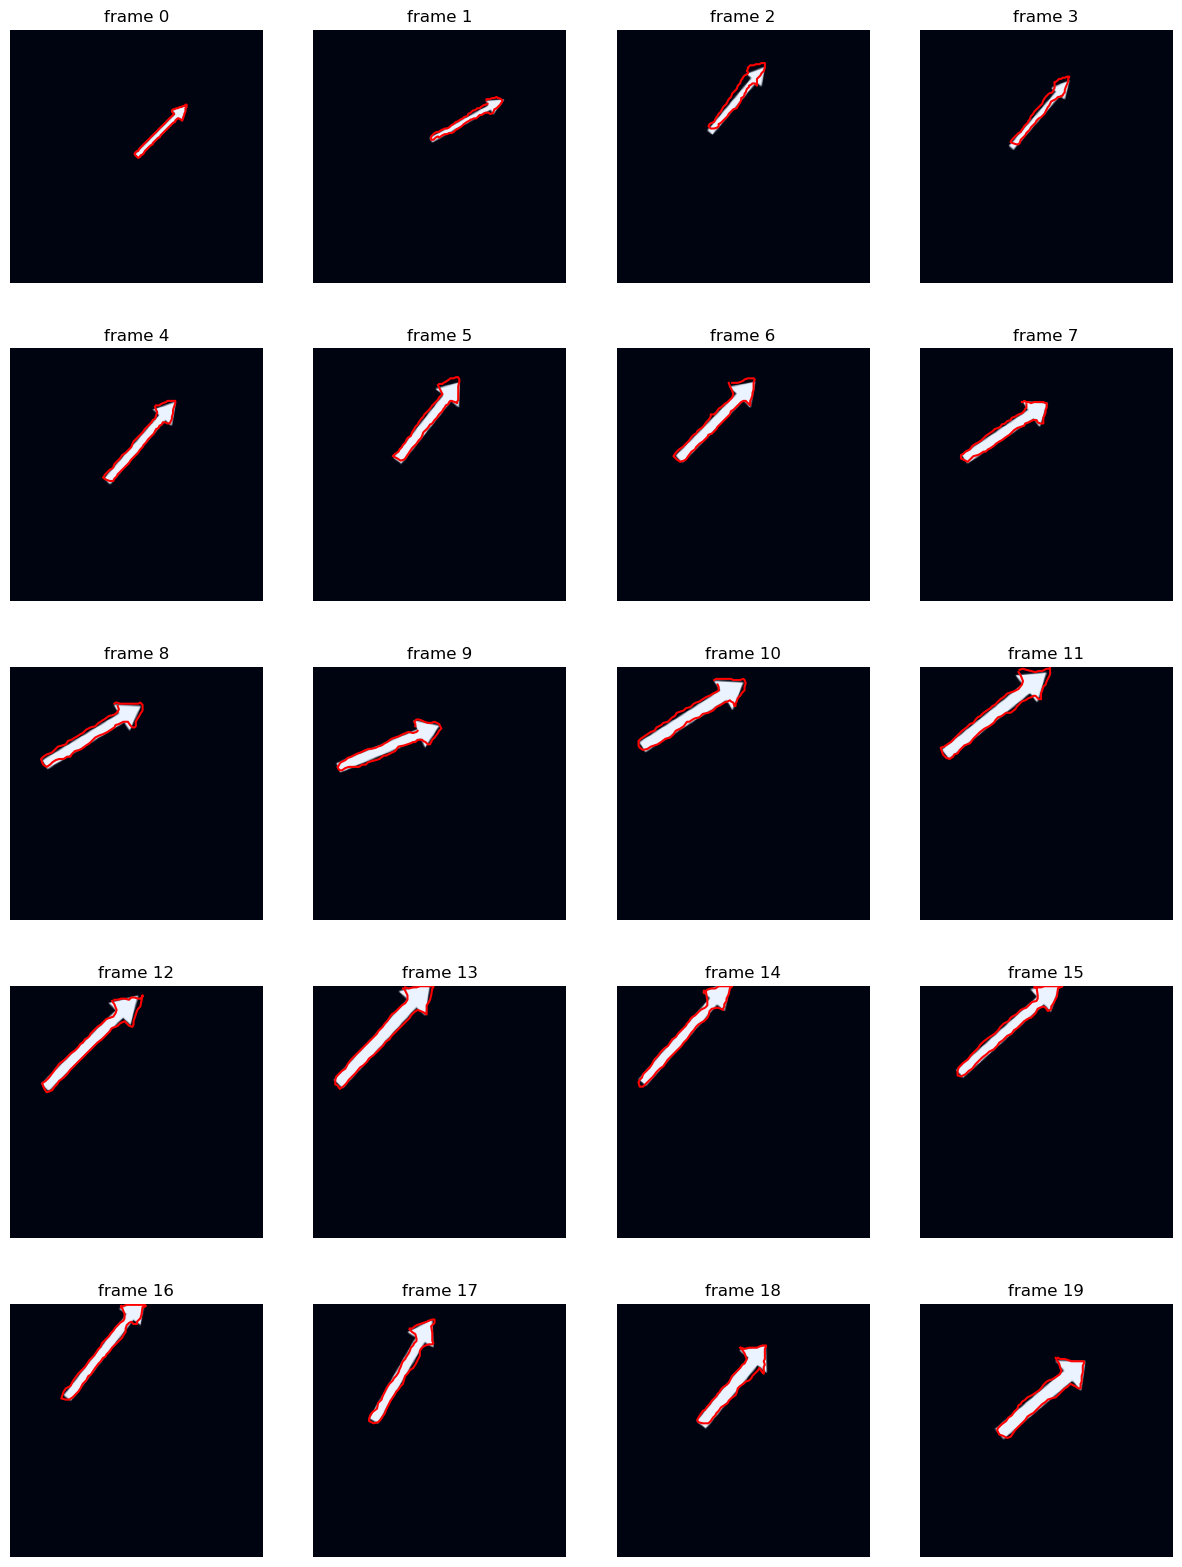

In [44]:
# video_idx = 4
# video_idx = 5
video_idx = 0
frame_idx = 0
print("IoU", model_infer.get_video_iou(video_idx))
model_infer.show_infer_result(video_idx, 0)

In [45]:
test_testset = TenVideoTest("./10video/test/total_data.json")
test_model_infer = TenVideoInfer(test_testset)

In [46]:
test_model_infer.infer_model(model)

In [47]:
test_model_infer.get_total_iou()

0.3235722087787166

IoU 0.13440907337658053


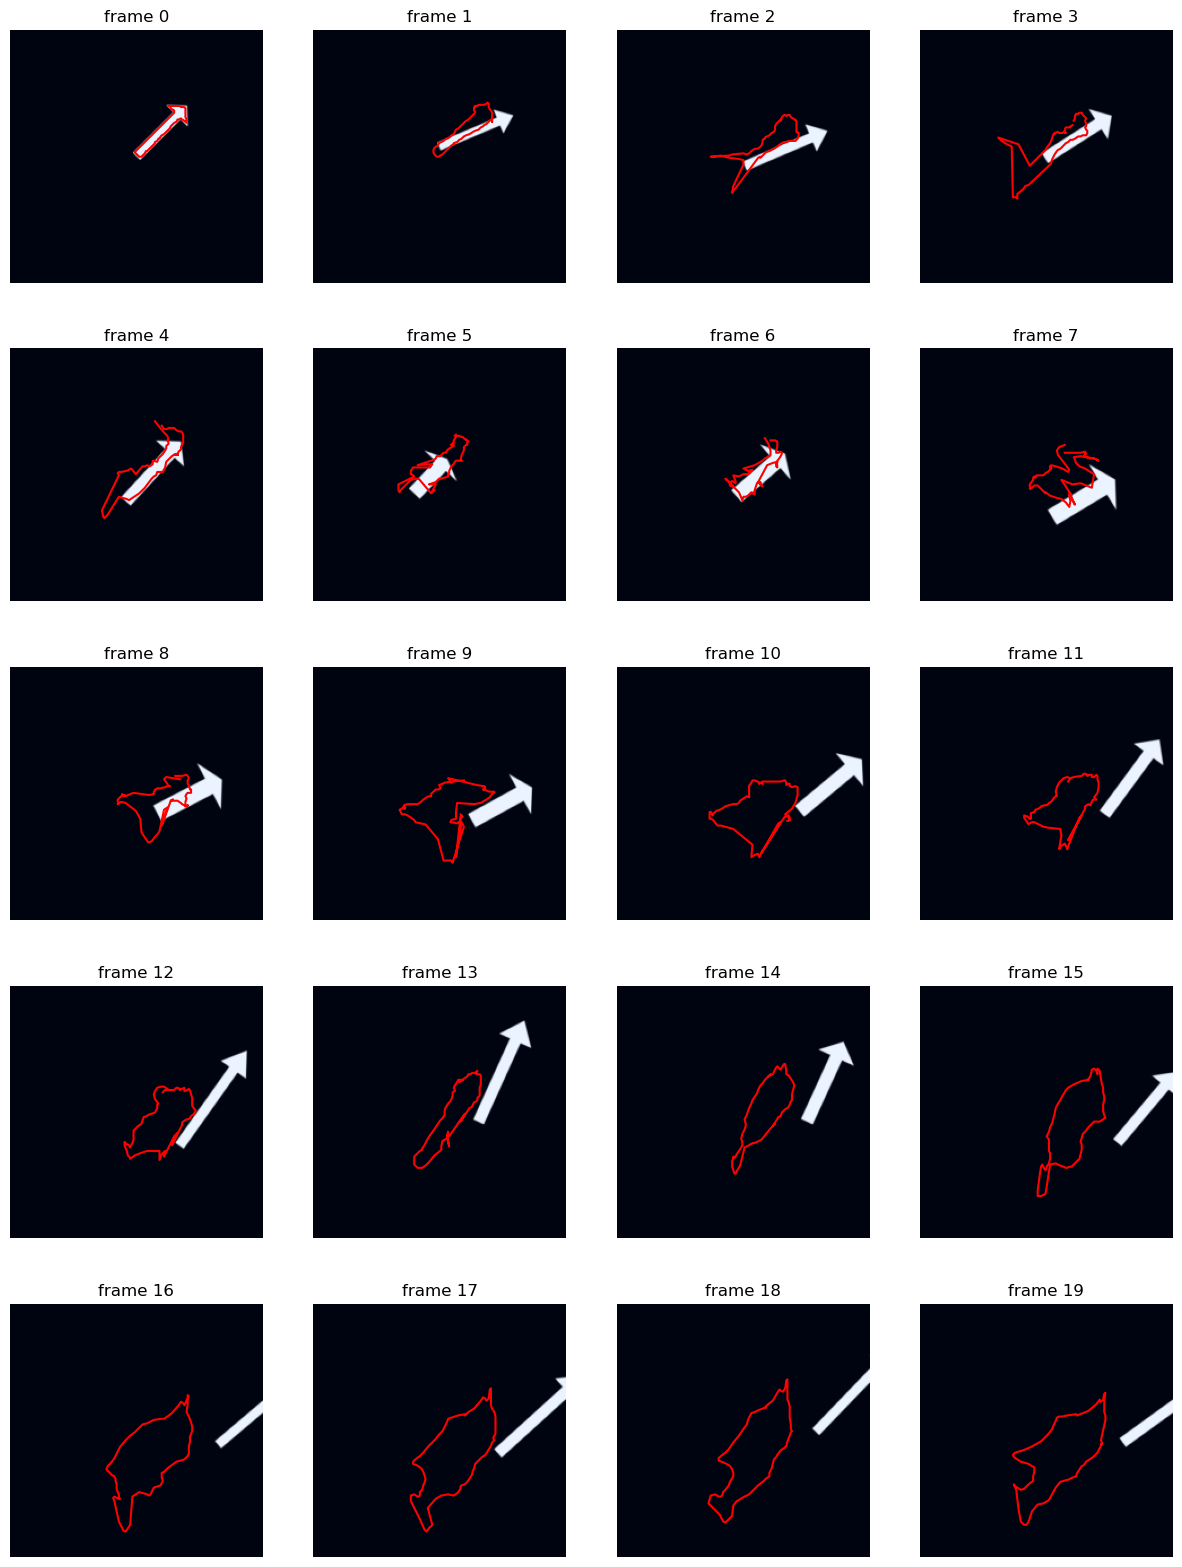

In [51]:
# video_idx = 4
# video_idx = 5
video_idx = 0
frame_idx = 0
print("IoU", test_model_infer.get_video_iou(video_idx))
test_model_infer.show_infer_result(video_idx, 0)